Latest notebook since December 2024
- changes were made to preprocessing.py
In this notebook:
    -data processing
    -data pairing
    -data vis

Script was cleaned on Dec. 18th 2024 by CVR

Part Ia. Loading all relevant packages

In [1]:
#Chunk that sloads necessary packages & sets working environment to where the jupyterlab notebook file is 
%load_ext autoreload
%autoreload 2
import gnssvod as gv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pdb
import importlib
import zipfile
import os
import xarray as xr
import glob
import shutil
from gnssvod.hemistats.hemistats import hemibuild
#import georinex as gr
#import qgrid as interactive table 
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates
import shutil
from matplotlib import rcParams
from datetime import datetime, timedelta


Part Ib. Batch Processing and Pairing- SNR

In [ ]:
#batch processing
pattern= {'MACROCOSM-2':'/data_demo/extracted/MACROCOSM-2/MACROCOSM-2*.23O'}
outputdir={'MACROCOSM-2':'extracted/MACROCOSM-2/MACROCOSM-2/nc/', }
keepvars=['S1C','S1X','S2C','S2X']
gv.preprocess(pattern,interval='15S',keepvars=keepvars,outputdir=outputdir)

In [19]:
#batch processing for one station
pattern= {'MACROCOSM-5':'data_demo/extracted/MACROCOSM-5/MACROCOSM-5*.25O'}
outputdir={'MACROCOSM-5':'extracted/MACROCOSM-5/MACROCOSM-5/nc/', }
keepvars=['S1C','S1X','S2C','S2X']
gv.preprocess(pattern,interval='15S',keepvars=keepvars,outputdir=outputdir)

Could not find any files matching the pattern data_demo/extracted/MACROCOSM-5/MACROCOSM-5*.25O
Could not find any files matching the pattern extracted/MACROCOSM-5/MACROCOSM-5/nc/*.nc


In [2]:
#data for each receiver
#setting pattern for processed data

pattern={'MACROCOSM-5':'/Volumes/coraldelmar/GNSSDat.2/data_demo/extracted/MACROCOSM-5/nc/*.nc',
         'MACROCOSM-2':'/Volumes/coraldelmar/GNSSDat.2/data_demo/extracted/MACROCOSM-2/nc/*.nc'}

In [11]:
#setting time intervals as pd.to_datetime
#Jan 2025 changed to january dates
startday = start=pd.to_datetime('10-01-2025',format='%d-%m-%Y')
timeintervals=pd.interval_range(start=startday, periods=365, freq='D', closed='left')
timeintervals

#end date can be added, if you want to pair specific dates-- see below
'''
startday = pd.to_datetime('01-10-2023', format='%d-%m-%Y')
endday = pd.to_datetime('31-10-2023', format='%d-%m-%Y')  
dates = pd.date_range(start=startday, end=endday, freq='D')
timeintervals = pd.interval_range(start=dates[0], end=dates[-1], freq='D', closed='left')

#
print(timeintervals)
'''

"\nstartday = pd.to_datetime('01-10-2023', format='%d-%m-%Y')\nendday = pd.to_datetime('31-10-2023', format='%d-%m-%Y')  \ndates = pd.date_range(start=startday, end=endday, freq='D')\ntimeintervals = pd.interval_range(start=dates[0], end=dates[-1], freq='D', closed='left')\n\n#\nprint(timeintervals)\n"

In [23]:

#setting range of October dates 
#
startday = pd.to_datetime('10-01-2025', format='%d-%m-%Y')
endday = pd.to_datetime('13-01-2025', format='%d-%m-%Y') 
dates = pd.date_range(start=startday, end=endday, freq='H')
timeintervals = pd.interval_range(start=dates[0], end=dates[-1], freq='H', closed='left')
print(timeintervals)

IntervalIndex([[2025-01-10 00:00:00, 2025-01-10 01:00:00),
               [2025-01-10 01:00:00, 2025-01-10 02:00:00),
               [2025-01-10 02:00:00, 2025-01-10 03:00:00),
               [2025-01-10 03:00:00, 2025-01-10 04:00:00),
               [2025-01-10 04:00:00, 2025-01-10 05:00:00),
               [2025-01-10 05:00:00, 2025-01-10 06:00:00),
               [2025-01-10 06:00:00, 2025-01-10 07:00:00),
               [2025-01-10 07:00:00, 2025-01-10 08:00:00),
               [2025-01-10 08:00:00, 2025-01-10 09:00:00),
               [2025-01-10 09:00:00, 2025-01-10 10:00:00),
               [2025-01-10 10:00:00, 2025-01-10 11:00:00),
               [2025-01-10 11:00:00, 2025-01-10 12:00:00),
               [2025-01-10 12:00:00, 2025-01-10 13:00:00),
               [2025-01-10 13:00:00, 2025-01-10 14:00:00),
               [2025-01-10 14:00:00, 2025-01-10 15:00:00),
               [2025-01-10 15:00:00, 2025-01-10 16:00:00),
               [2025-01-10 16:00:00, 2025-01-10 17:00:00

/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_14543/2774280613.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start=startday, end=endday, freq='H')
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_14543/2774280613.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timeintervals = pd.interval_range(start=dates[0], end=dates[-1], freq='H', closed='left')


In [24]:
#pairing reference and subcanopy station 
#subcanopy is MAC2, reference is MAC 5

#pairings={'MACROCOSM-5':('MACROCOSM-5')}
#timeintervals = pd.interval_range(start=dates[0], end=dates[-1], freq='D', closed='left')
print(timeintervals)
pattern={'MACROCOSM-5':'/Volumes/coraldelmar/GNSSDat.2/data_demo/extracted/MACROCOSM-5/*.25O'}
outputdir={'MACROCOSM-5':'/Volumes/coraldelmar/GNSSDat.2/data_demo/extracted/MACROCOSM-5/*.nc'}
keepvars=['S1','S2','Azimuth','Elevation']
out=gv.gather_stations(pattern,timeintervals,keepvars=None,outputdir=outputdir)

IntervalIndex([[2025-01-10 00:00:00, 2025-01-10 01:00:00),
               [2025-01-10 01:00:00, 2025-01-10 02:00:00),
               [2025-01-10 02:00:00, 2025-01-10 03:00:00),
               [2025-01-10 03:00:00, 2025-01-10 04:00:00),
               [2025-01-10 04:00:00, 2025-01-10 05:00:00),
               [2025-01-10 05:00:00, 2025-01-10 06:00:00),
               [2025-01-10 06:00:00, 2025-01-10 07:00:00),
               [2025-01-10 07:00:00, 2025-01-10 08:00:00),
               [2025-01-10 08:00:00, 2025-01-10 09:00:00),
               [2025-01-10 09:00:00, 2025-01-10 10:00:00),
               [2025-01-10 10:00:00, 2025-01-10 11:00:00),
               [2025-01-10 11:00:00, 2025-01-10 12:00:00),
               [2025-01-10 12:00:00, 2025-01-10 13:00:00),
               [2025-01-10 13:00:00, 2025-01-10 14:00:00),
               [2025-01-10 14:00:00, 2025-01-10 15:00:00),
               [2025-01-10 15:00:00, 2025-01-10 16:00:00),
               [2025-01-10 16:00:00, 2025-01-10 17:00:00

TypeError: gather_stations() missing 1 required positional argument: 'timeintervals'

In [27]:
pattern = "/Volumes/coraldelmar/GNSSDat.2/data_demo/extracted/MACROCOSM-5/*.nc"
#timeintervals = pd.interval_range(start=pd.Timestamp('1/1/2025'), periods=8, freq='D')  # Adjust based on expected format
outputdir = {'MACROCOSM-5': pattern}
keepvars = ['S1', 'S2', 'Azimuth', 'Elevation']

out = gv.gather_stations(pattern, timeintervals, keepvars=keepvars, outputdir=outputdir)


TypeError: gather_stations() missing 1 required positional argument: 'timeintervals'

In [15]:
print("timeintervals:", timeintervals)
print("Type:", type(timeintervals))


timeintervals: ['2025-01-01', '2025-01-31']
Type: <class 'list'>


In [16]:
help(gv.gather_stations)


Help on function gather_stations in module gnssvod.io.preprocess:

gather_stations(filepattern, pairings, timeintervals, keepvars=None, outputdir=None, compress=True)
    Merges observations from different sites according to specified pairing rules over the desired time intervals.
    The new dataframe will contain a new index level corresponding to each site, with keys corresponding to station names.

    Parameters
    ----------
    filepattern: dictionary
        Dictionary of any number station names and UNIX-style patterns to find the preprocessed NetCDF files
        observation files. For example filepattern={'station1':'/path/to/files/of/station1/*.nc',
                                                    'station2':'/path/to/files/of/station2/*.nc'}

    pairings: dictionary
        Dictionary of case names associated to a tuple of station names indicating which stations to gather
        For example pairings={'case1':('station1','station2')}
        If data is to be saved, th

In [24]:
out['MACROCOSM'][0][1]

NameError: name 'out' is not defined

In [25]:
ds=xr.open_mfdataset('/Volumes/coraldelmar/GNSSDat.2/data_demo/extracted/MACROCOSM-5/nc/*.nc', combine='nested',concat_dim="Epoch")
ds

<xarray.Dataset> Size: 1GB
Dimensions:    (Epoch: 225254, SV: 105)
Coordinates:
  * SV         (SV) <U3 1kB 'C11' 'C12' 'C14' 'C19' ... 'R23' 'R24' 'R25' 'R26'
  * Epoch      (Epoch) datetime64[ns] 2MB 2023-05-08T12:18:45 ... 2024-05-13T...
Data variables:
    S1C        (Epoch, SV) float64 189MB dask.array<chunksize=(7, 19), meta=np.ndarray>
    S1X        (Epoch, SV) float64 189MB dask.array<chunksize=(7, 19), meta=np.ndarray>
    S2C        (Epoch, SV) float64 189MB dask.array<chunksize=(7, 19), meta=np.ndarray>
    S2X        (Epoch, SV) float64 189MB dask.array<chunksize=(7, 19), meta=np.ndarray>
    Azimuth    (Epoch, SV) float64 189MB dask.array<chunksize=(7, 19), meta=np.ndarray>
    Elevation  (Epoch, SV) float64 189MB dask.array<chunksize=(7, 19), meta=np.ndarray>
Attributes:
    filename:           data_demo/extracted/MACROCOSM-5/MACROCOSM-5_raw_20230...
    observation_types:  ['S1C', 'S1X', 'S2C', 'S2X', 'Azimuth', 'Elevation']
    epoch:              2023-05-08
    approx_position:    [ 2481059.8071 -5525682.2093  1992263.4961]

In [26]:
#df=ds.to_dataframe().dropna(how='all').reorder_levels(["Epoch", "SV"]).sort_index()
#OG changed for water addition test:
df=ds.to_dataframe().dropna(how='all').reorder_levels(["Station", "Epoch", "SV"]).sort_index()

df

KeyError: 'Level Station not found'

In [31]:
df = ds.to_dataframe().dropna(how="all").reset_index()  # Ensure all coordinates become columns

if "Station" not in df.columns:
    df["Station"] = "MACROCOSM"  # Assign a default station name

df = df.set_index("Station", append=True)
df = df.reorder_levels(["Station", "Epoch", "SV"]).sort_index()


KeyError: 'Level Epoch not found'

Part  Ic. SNR Vis
-> here I am looking for other ways to visualize and better streamline the process

TypeError: NDFrame.xs() missing 1 required positional argument: 'key'

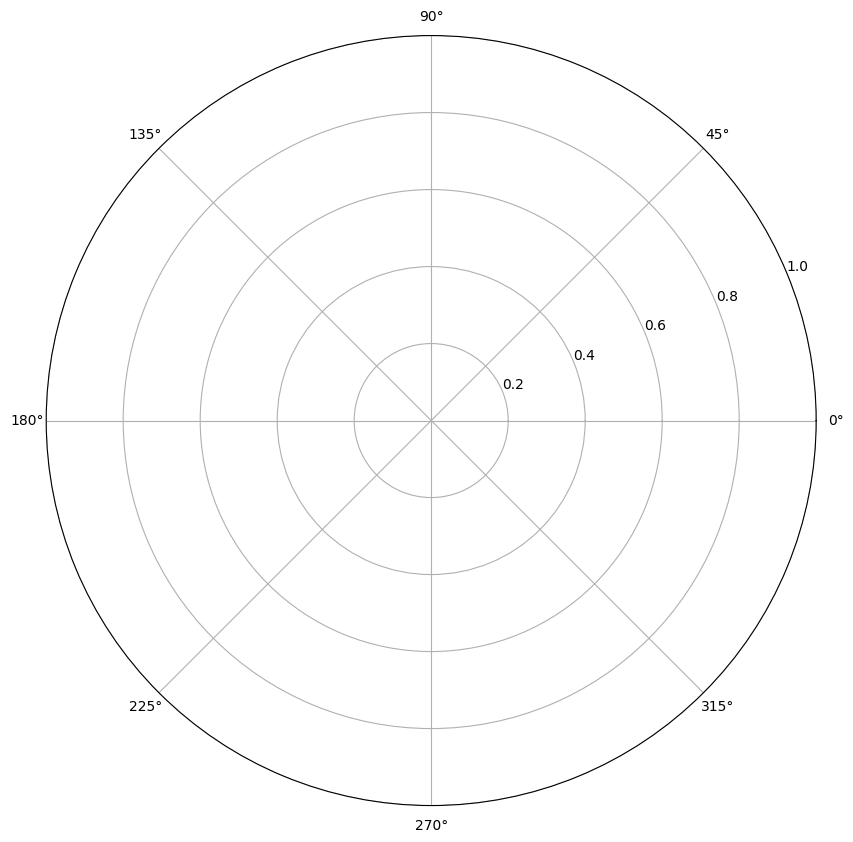

In [14]:
mySV='G10'
#
fig, ax=plt.subplots(figsize=(10,10),subplot_kw=dict(projection='polar'))
subdf=df.xs(level='Epoch')

radius=90-subdf.Elevation
theta=np.deg2rad(subdf.Azimuth)

hs=ax.scatter(theta,radius,c=subdf.S1C)
ax.set_rlim([0,90])
ax.set_theta_zero_location("N")

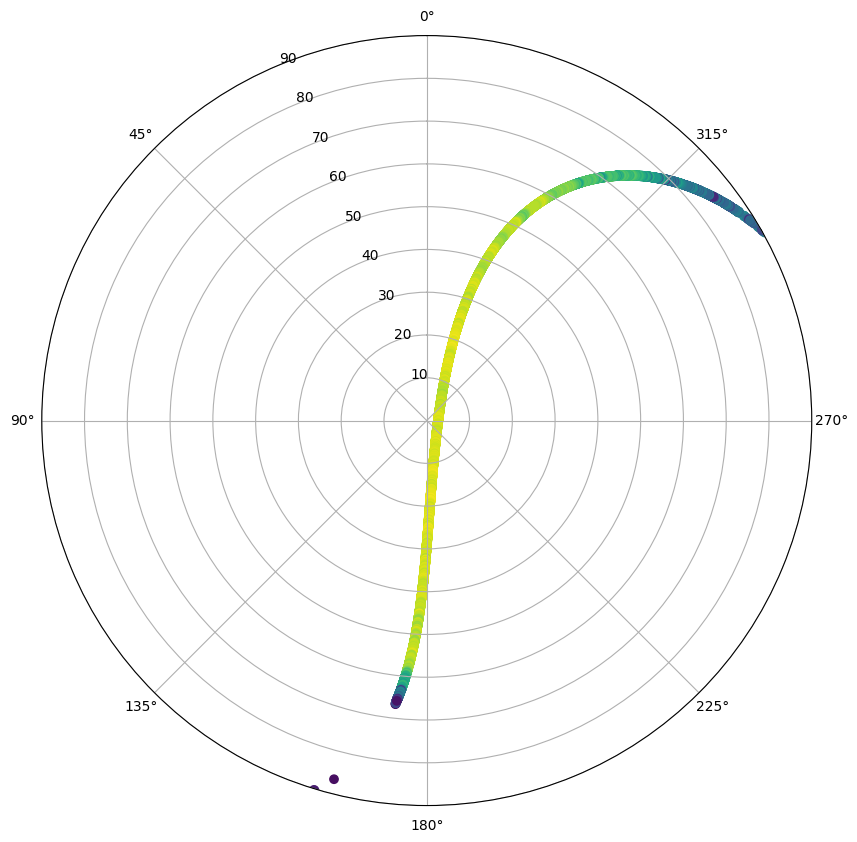

In [11]:
mySV='G10'
mystation_name='MACROCOSM-5'
fig, ax=plt.subplots(figsize=(10,10),subplot_kw=dict(projection='polar'))
subdf=df.xs(mySV,level='SV').xs(mystation_name,level='Station')

radius=90-subdf.Elevation
theta=np.deg2rad(subdf.Azimuth)

hs=ax.scatter(theta,radius,c=subdf.S1C)
ax.set_rlim([0,90])
ax.set_theta_zero_location("N")


In [15]:
mySV='G10'
station_names=df.index.get_level_values('Station').unique()
clim=[15,47]
fig,ax=plt.subplots(1,len(station_names),figsize=(10,10),subplot_kw=dict(projection='polar'))
for i, iname in enumerate (station_names):
    subdf=df.xs(mySV,level='SV').xs(iname, level='Station')
    radius=90-subdf.Elevation
    theta=np.deg2rad(subdf.Azimuth)
    hs=ax[i].scatter(theta,radius,c=subdf.S1C)
    hs.set_clim(clim)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)
plt.colorbar(hs,ax=ax, location='bottom',shrink=.5,pad=0.05,label='SNR (L1)')

KeyError: 'Level Station not found'

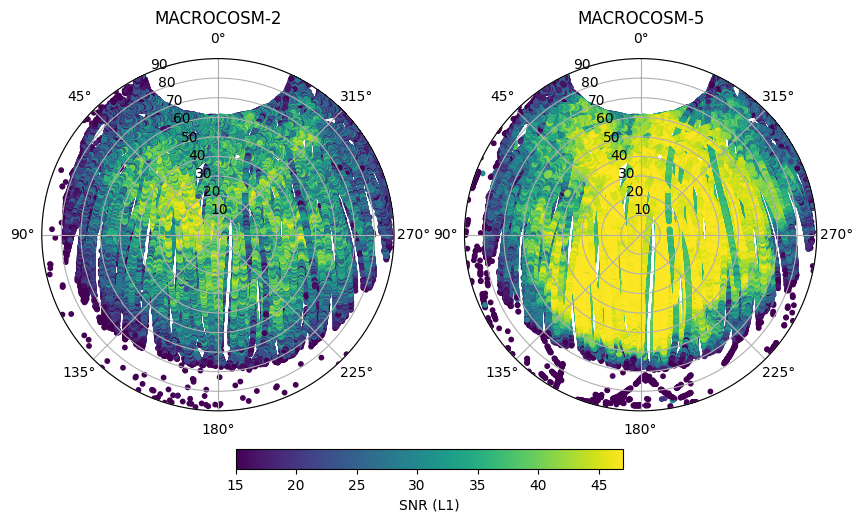

In [8]:

station_names=df.index.get_level_values('Station').unique()
clim=[15,47]
fig,ax=plt.subplots(1,len(station_names),figsize=(10,10),subplot_kw=dict(projection='polar'))
for i, iname in enumerate (station_names):
    subdf=df.xs(iname, level='Station')
    radius=90-subdf.Elevation
    theta=np.deg2rad(subdf.Azimuth)
    hs=ax[i].scatter(theta,radius,c=subdf.S1C,s=10)
    hs.set_clim(clim)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)
plt.colorbar(hs,ax=ax, location='bottom',shrink=.5,pad=0.05,label='SNR (L1)')

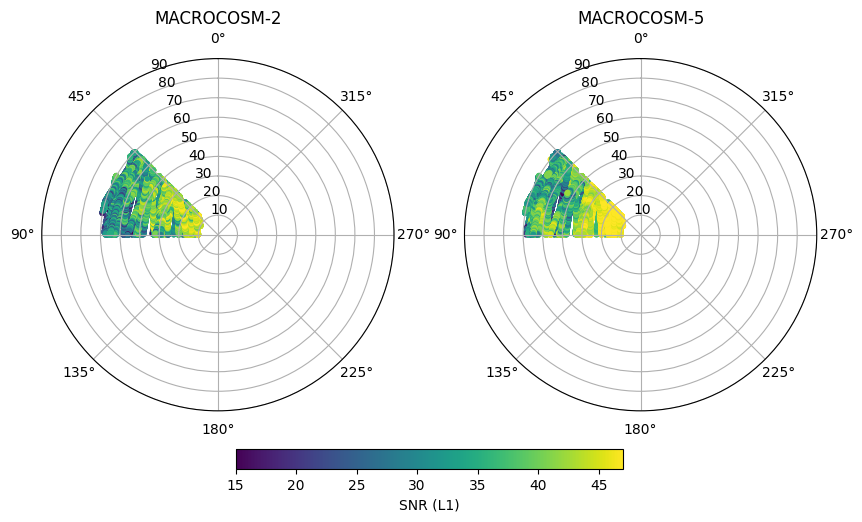

In [9]:
#masking for area with high SNR
station_names = df.index.get_level_values('Station').unique()
clim = [15, 47]

fig, ax = plt.subplots(1, len(station_names), figsize=(10, 10), subplot_kw=dict(projection='polar'))

for i, iname in enumerate(station_names):
    subdf = df.xs(iname, level='Station')
    radius = 90 - subdf.Elevation
    theta = np.deg2rad(subdf.Azimuth)
    
    # filtering the data for radial (10-30) and angular (45°-90°) ranges
    mask = (radius >= 10) & (radius <= 60) & (theta >= np.deg2rad(45)) & (theta <= np.deg2rad(90))
    filtered_radius = radius[mask]
    filtered_theta = theta[mask]
    filtered_S1C = subdf.S1C[mask]
    
    # 
    hs = ax[i].scatter(filtered_theta, filtered_radius, c=filtered_S1C, s=10)
    hs.set_clim(clim)
    ax[i].set_rlim([0, 90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

# 
plt.colorbar(hs, ax=ax, location='bottom', shrink=.5, pad=0.05, label='SNR (L1)')

Part II. VOD set up & Vis

In [10]:
#calculating VOD
pattern='/Volumes/coraldelmar/GNSSDat.2/data_demo/MACROCOSM_paired_Oct/*.nc'
pairings={'MACROCOSM':('MACROCOSM-5','MACROCOSM-2')}
bands={'VOD1':['S1','S1X','S1C'],'VOD2':['S2','S2X','S2C']}

vod=gv.calc_vod(pattern,pairings,bands)
vod=vod['MACROCOSM']

vod

VOD1      VOD2  Azimuth  Elevation
Epoch               SV                                         
2023-10-19 19:01:15 G10  2.043531  0.860434   -178.3       69.1
                    G25 -0.358198  0.309353     49.6       45.0
                    G26  1.417108       NaN   -152.6       33.0
                    G28  0.932114  1.723531    -45.5       49.8
                    G31  1.256031       NaN    -82.0       37.8
...                           ...       ...      ...        ...
2023-10-23 23:59:45 R12  0.653872  1.483787     13.7       33.1
                    R13  1.721543  0.690101    -36.3       18.8
                    R21       NaN       NaN     31.9       11.3
                    R22  2.071093 -0.250535     70.5       46.5
                    R23       NaN       NaN      NaN        NaN

[1482069 rows x 4 columns]

In [11]:
#calculating avg vod

hemi = gv.hemibuild(2)
# get patches for plotting later
patches = hemi.patches()
# classify vod into grid cells, drop azimuth and elevation afterwards as we don't need it anymore
vod = hemi.add_CellID(vod)
# get average value per grid cell
vod_avg = vod.groupby(['CellID']).agg(['mean', 'std', 'count'])
# flatten the columns
vod_avg.columns = ["_".join(x) for x in vod_avg.columns.to_flat_index()]
vod_avg

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gnssvod/hemistats/hemistats.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idf=idf.groupby('eleind',group_keys=False).apply(azicut) # groupby will drop rows with eleind=NaN
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gnssvod/hemistats/hemistats.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  iele = idf.eleind[0]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gnssvod/hemistats/hemistats.py:80: FutureWarning: Series.__getitem__ treating keys as positions is 

VOD1_mean  VOD1_std  VOD1_count  VOD2_mean  VOD2_std  VOD2_count  \
CellID                                                                     
0        1.416792  0.828300          58   2.432049  0.495309          35   
1        0.766220  0.533573         111   2.021463  0.463467          29   
2        0.976189  0.552327         201   1.775269  0.391384         125   
3        0.998320  0.398822         205   1.538843  0.363820         130   
4        0.697439  0.436888          95   1.994304  0.737421          25   
...           ...       ...         ...        ...       ...         ...   
6427          NaN       NaN           0  -0.012051       NaN           1   
6428    -0.008517  0.043381         101   0.010464  0.027344           9   
6429     0.005891  0.046660         279   0.008977  0.048880          10   
6430     0.021624  0.046510          63   0.007414  0.015427           2   
6431     0.020497  0.051905         117   0.012593  0.027918           5   

        Azimuth_mean  Azimuth_std  Azimuth_count  Elevation_mean  \
CellID                                                             
0         -18.548529   102.416451             68       89.379412   
1          27.140146    12.729848            137       87.751825   
2          67.945489    12.992776            266       87.750376   
3         111.088031    12.814586            259       87.765251   
4         150.075676     9.867147            111       87.769369   
...              ...          ...            ...             ...   
6427      -31.933333     0.115470              3        2.933333   
6428      -30.148182     0.230568            110        2.042727   
6429      -29.159259     0.434792            297        2.102020   
6430      -27.436364     0.527005             66        2.266667   
6431      -26.080469     0.422229            128        2.125781   

        Elevation_std  Elevation_count  
CellID                                  
0            0.240372               68  
1            0.520902              137  
2            0.513828              266  
3            0.544341              259  
4            0.490416              111  
...               ...              ...  
6427         0.115470                3  
6428         0.596082              110  
6429         0.592061              297  
6430         0.543870               66  
6431         0.523653              128  

[5102 rows x 12 columns]

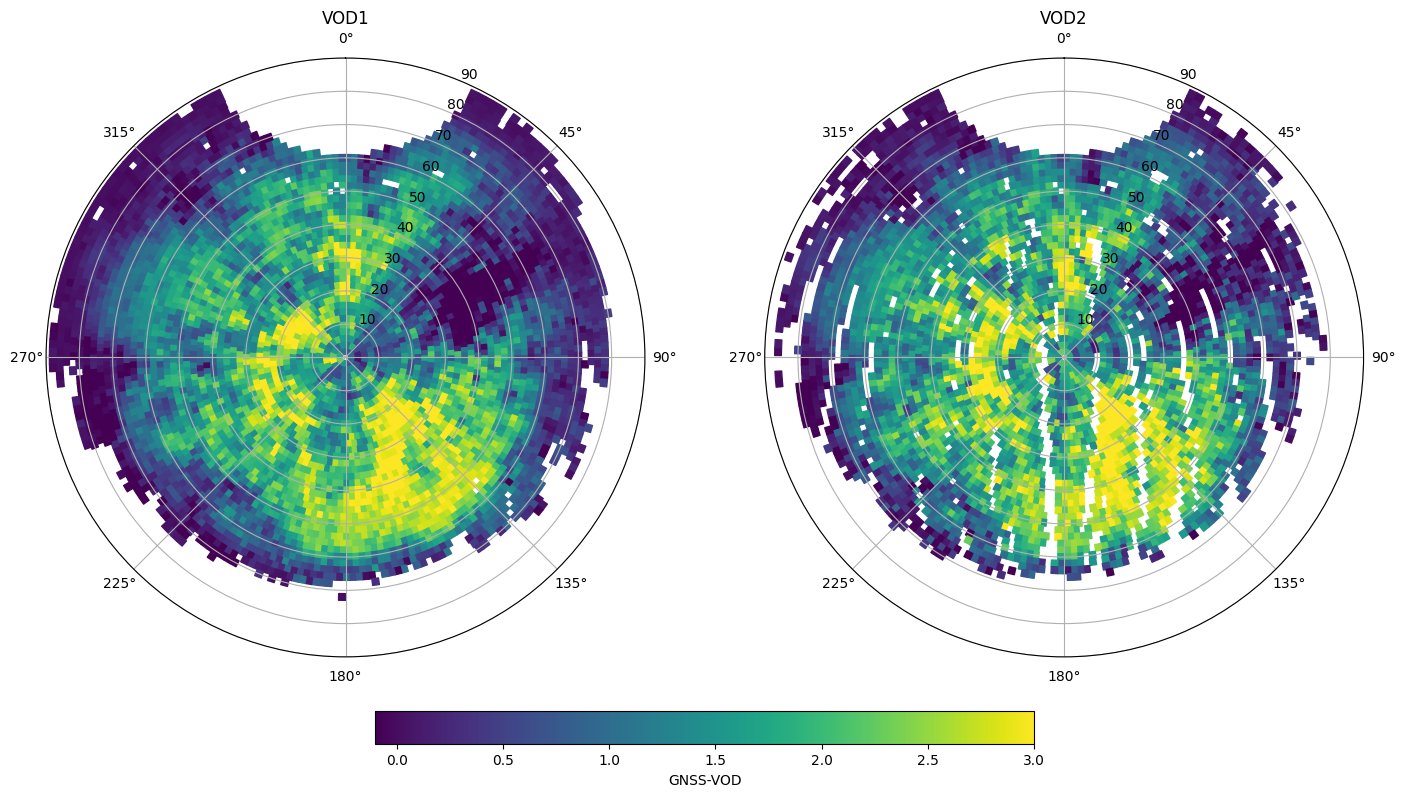

In [12]:
#patchy VOD
fig, ax = plt.subplots(1,2,figsize=(17,14),subplot_kw=dict(projection='polar'))

vod_names = ['VOD1','VOD2']
for i, iname in enumerate(vod_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,vod_avg[f"{iname}_mean"]],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches[f"{iname}_mean"],edgecolor='face', linewidth=1)
    pc.set_clim([-0.1,3])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_theta_direction(-1)
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='GNSS-VOD')

Data for VOD1 after filtering: 4475 points
VOD1 - Low values: 1119
VOD1 - Medium values: 2237
VOD1 - High values: 1119
Data for VOD2 after filtering: 2872 points
VOD2 - Low values: 718
VOD2 - Medium values: 1436
VOD2 - High values: 718


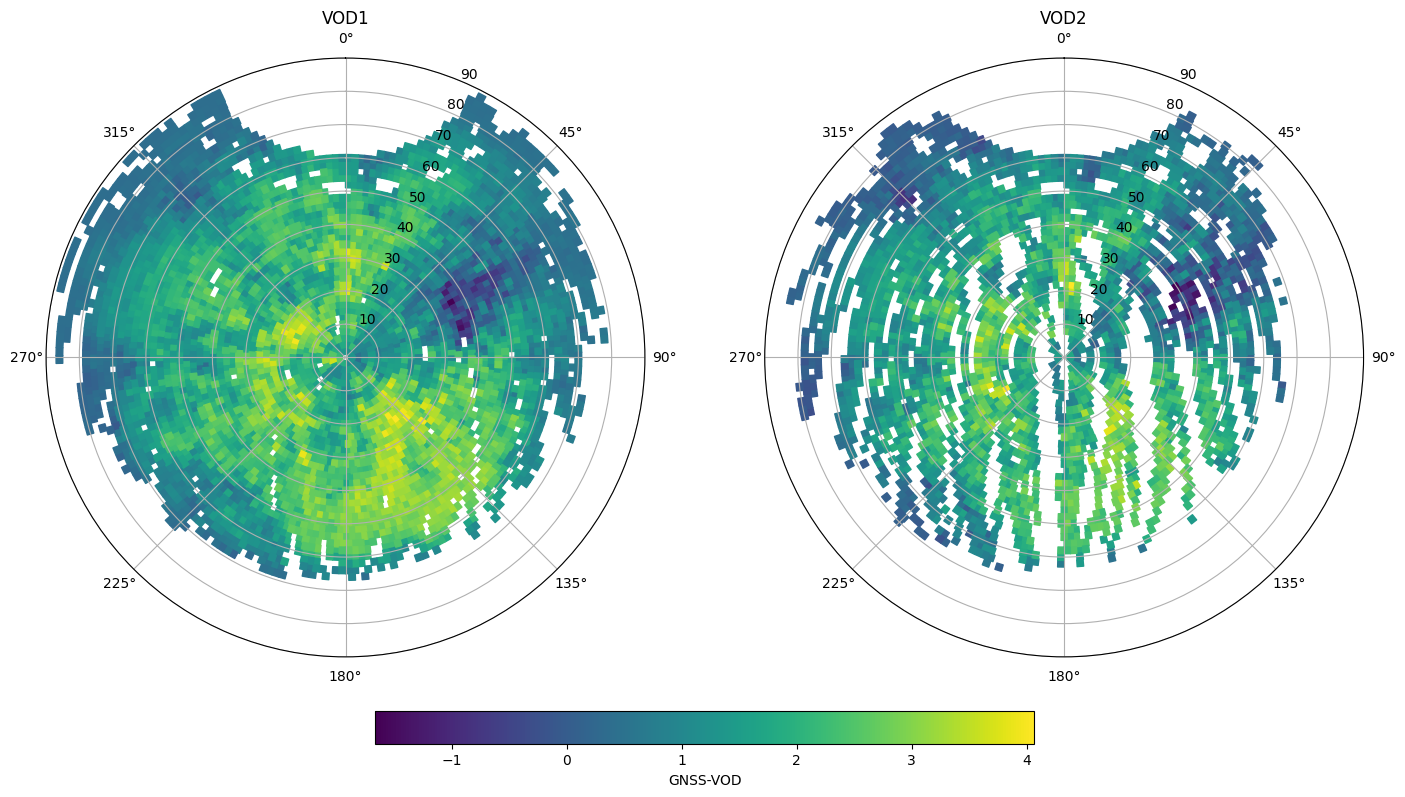

In [13]:
#patchy vod set as low, medium, and high 

vod_names = ['VOD1', 'VOD2']
fig, ax = plt.subplots(1, 2, figsize=(17, 14), subplot_kw=dict(projection='polar'))
 
cmap = plt.cm.viridis   

for i, iname in enumerate(vod_names):
    ivod_data = vod_avg[f"{iname}_mean"].where(vod_avg[f"{iname}_count"] > 40)
    
 
    print(f"Data for {iname} after filtering: {ivod_data.dropna().shape[0]} points")
    
    if ivod_data.dropna().shape[0] == 0:
        print(f"No valid data to plot for {iname}, skipping...")
        continue
    
    # by percentile of vod
    low_threshold = np.percentile(ivod_data.dropna(), 25)
    high_threshold = np.percentile(ivod_data.dropna(), 75)
    
    #class.values into low, med, and high VOD
    low_values = ivod_data.where(ivod_data <= low_threshold).dropna()
    medium_values = ivod_data.where((ivod_data > low_threshold) & (ivod_data <= high_threshold)).dropna()
    high_values = ivod_data.where(ivod_data > high_threshold).dropna()
    
    # 
    print(f"{iname} - Low values: {low_values.shape[0]}")
    print(f"{iname} - Medium values: {medium_values.shape[0]}")
    print(f"{iname} - High values: {high_values.shape[0]}")
    
    #  
    ipatches_low = pd.concat([patches, low_values], join='inner', axis=1)
    ipatches_medium = pd.concat([patches, medium_values], join='inner', axis=1)
    ipatches_high = pd.concat([patches, high_values], join='inner', axis=1)

    #  
    pc_low = PatchCollection(ipatches_low.Patches, array=ipatches_low[f"{iname}_mean"], edgecolor='face', linewidth=1, cmap=cmap)
    pc_medium = PatchCollection(ipatches_medium.Patches, array=ipatches_medium[f"{iname}_mean"], edgecolor='face', linewidth=1, cmap=cmap)
    pc_high = PatchCollection(ipatches_high.Patches, array=ipatches_high[f"{iname}_mean"], edgecolor='face', linewidth=1, cmap=cmap)
    
    #  
    all_values = np.concatenate([low_values.values, medium_values.values, high_values.values])
    pc_low.set_clim([np.min(all_values), np.max(all_values)])
    pc_medium.set_clim([np.min(all_values), np.max(all_values)])
    pc_high.set_clim([np.min(all_values), np.max(all_values)])
    
    #  
    ax[i].add_collection(pc_low)
    ax[i].add_collection(pc_medium)
    ax[i].add_collection(pc_high)
    
    #  
    ax[i].set_rlim([0, 90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_theta_direction(-1)
    ax[i].set_title(iname)

# 
plt.colorbar(pc_low, ax=ax, location='bottom', shrink=.5, pad=0.05, label='GNSS-VOD')

plt.show()

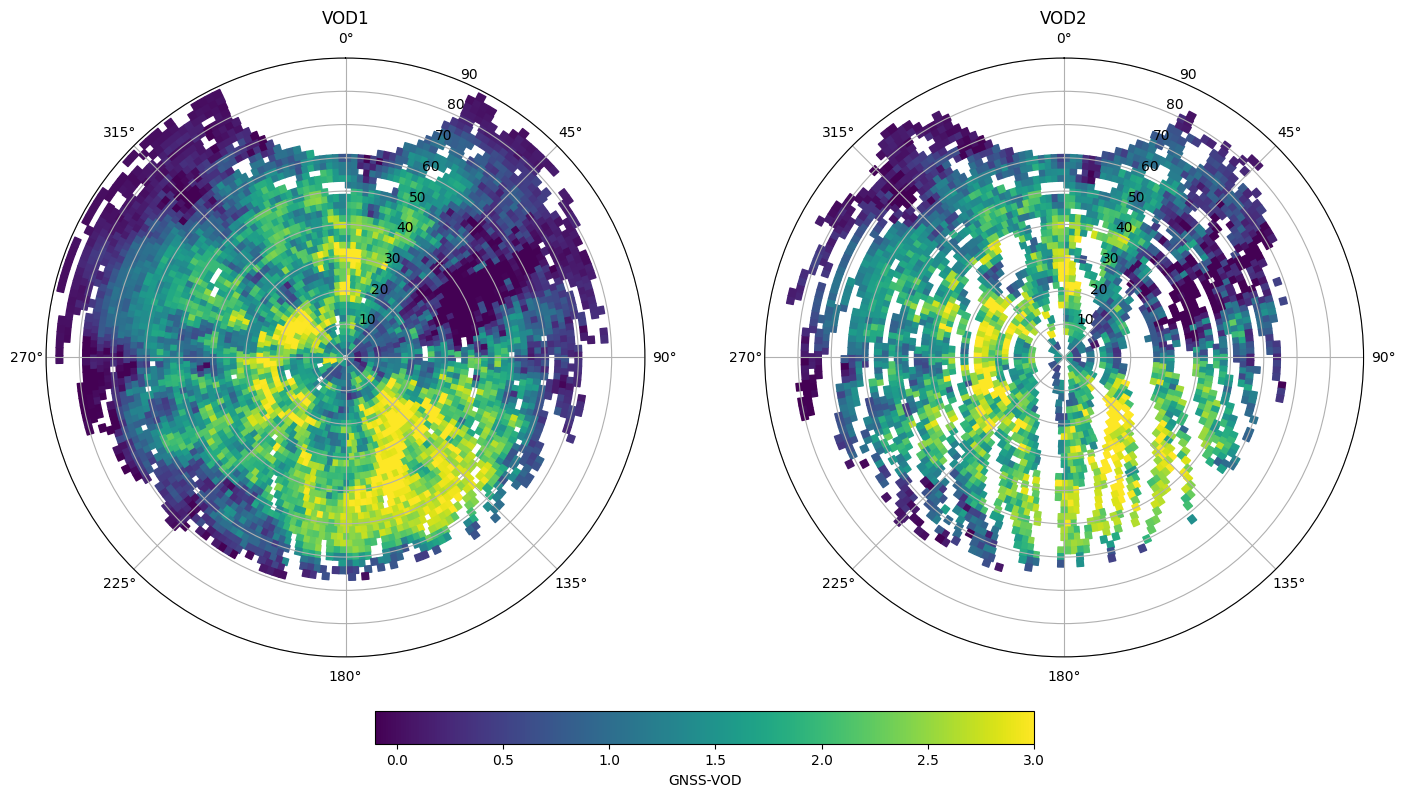

In [14]:
#MEAN
fig, ax = plt.subplots(1,2,figsize=(17,14),subplot_kw=dict(projection='polar'))

vod_names = ['VOD1','VOD2']
for i, iname in enumerate(vod_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ivod_data = vod_avg[f"{iname}_mean"].where(vod_avg[f"{iname}_count"]>40)
    ipatches = pd.concat([patches,ivod_data],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches[f"{iname}_mean"],edgecolor='face', linewidth=1)
    pc.set_clim([-0.1,3])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_theta_direction(-1)
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='GNSS-VOD')

/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/2789935459.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean = vod_numeric.resample('H').mean()


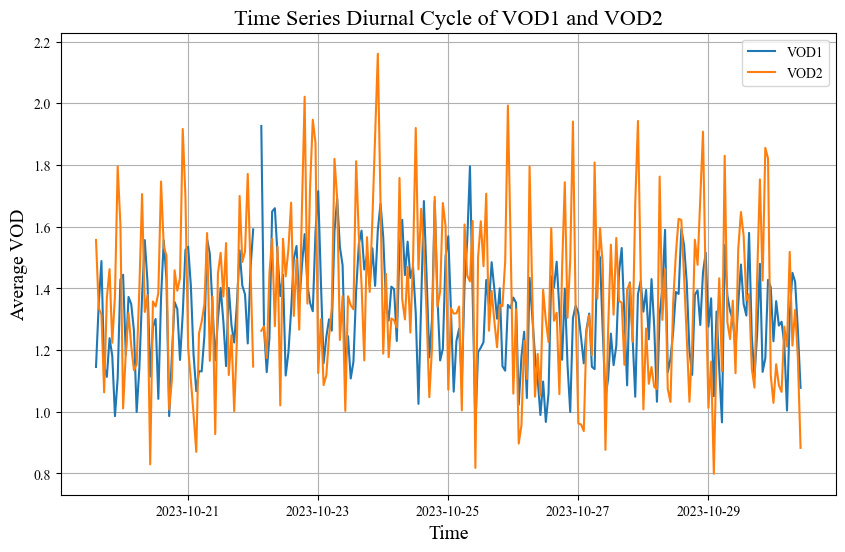

In [15]:
#VOD Diurnal Cycle

#font changing
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

#
vod_reset = vod.reset_index()
#vod_reset['Epoch']=vod_reset['Epoch']+datetime.timedelta(hours=-5)
vod_reset['Epoch'] = pd.to_datetime(vod_reset['Epoch'])
#.tz_convert('UTC-05')
vod_reset['Epoch']=vod_reset['Epoch']+timedelta(hours=-5) # local PR time
vod_reset.set_index('Epoch', inplace=True)
vod_numeric = vod_reset[['VOD1', 'VOD2']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_hourly_mean = vod_numeric.resample('H').mean()

# plotting
plt.figure(figsize=(10, 6))
plt.plot(vod_hourly_mean.index, vod_hourly_mean['VOD1'], label='VOD1')
plt.plot(vod_hourly_mean.index, vod_hourly_mean['VOD2'], label='VOD2')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Average VOD', fontsize=14)
plt.title('Time Series Diurnal Cycle of VOD1 and VOD2', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

Part IIb. VOD 'statistics'

In [16]:
# merge statistics with the original VOD measurements
vod_anom = vod.join(vod_avg,on='CellID')
vod_anom

VOD1      VOD2  Azimuth  Elevation  CellID  \
Epoch               SV                                                    
2023-10-19 19:01:15 G10  2.043531  0.860434   -178.3       69.1     397   
                    G25 -0.358198  0.309353     49.6       45.0    1944   
                    G26  1.417108       NaN   -152.6       33.0    3100   
                    G28  0.932114  1.723531    -45.5       49.8    1591   
                    G31  1.256031       NaN    -82.0       37.8    2572   
...                           ...       ...      ...        ...     ...   
2023-10-23 23:59:45 R11  0.668455       NaN     72.5       14.0    4907   
                    R12  0.653872  1.483787     13.7       33.1    2806   
                    R13  1.721543  0.690101    -36.3       18.8    4621   
                    R21       NaN       NaN     31.9       11.3    5104   
                    R22  2.071093 -0.250535     70.5       46.5    1794   

                         VOD1_mean  VOD1_std  VOD1_count  VOD2_mean  VOD2_std  \
Epoch               SV                                                          
2023-10-19 19:01:15 G10   1.792505  0.863591         361   0.859959  0.432072   
                    G25   0.640875  0.602834         564   1.071919  0.706692   
                    G26   1.095902  0.728083         449   1.102654  0.725691   
                    G28   1.812176  0.826295         456   1.977728  0.775424   
                    G31   1.374339  0.633845         245   1.825128  0.666023   
...                            ...       ...         ...        ...       ...   
2023-10-23 23:59:45 R11   0.250760  0.332689         148        NaN       NaN   
                    R12   1.474297  0.696934          83   1.290631  0.475702   
                    R13   0.436027  0.414786        1051   0.564306  0.397499   
                    R21   0.355067  0.277390         110   0.309614  0.119947   
                    R22   0.672945  0.995921         210  -0.645612  0.589574   

                         VOD2_count  Azimuth_mean  Azimuth_std  Azimuth_count  \
Epoch               SV                                                          
2023-10-19 19:01:15 G10         187   -177.281994     1.185319            361   
                    G25         483     49.018555     0.613285            609   
                    G26         270   -152.989249     0.470757            493   
                    G28         360    -45.254167     0.711467            504   
                    G31         162    -82.556250     0.584046            384   
...                             ...           ...          ...            ...   
2023-10-23 23:59:45 R11           0     72.168159     0.442359            201   
                    R12          68     14.226506     0.547519             83   
                    R13         678    -35.660245     0.510182           1308   
                    R21          13     31.486207     0.436368            116   
                    R22         151     71.374609     0.643169            256   

                         Elevation_mean  Elevation_std  Elevation_count  
Epoch               SV                                                   
2023-10-19 19:01:15 G10       70.049307       0.580092              361  
                    G25       43.772742       0.626928              609  
                    G26       32.031440       0.592917              493  
                    G28       49.822817       0.385749              504  
                    G31       37.885156       0.502332              384  
...                                 ...            ...              ...  
2023-10-23 23:59:45 R11       13.966169       0.780865              201  
                    R12       33.709639       0.586768               83  
                    R13       18.069801       0.553985             1308  
                    R21       12.398276       0.520699              116  
                    R22       46.487891       0.557419   

In [17]:
#anomaly= VOD-VOD mean
vod_anom['VOD1_anom'] = vod_anom['VOD1']-vod_anom['VOD1_mean']
vod_anom['VOD2_anom'] = vod_anom['VOD2']-vod_anom['VOD2_mean']

Text(0.5, 1.0, 'GNSS-VOD at Luquillo, Puerto Rico , October 19-28, 2023')

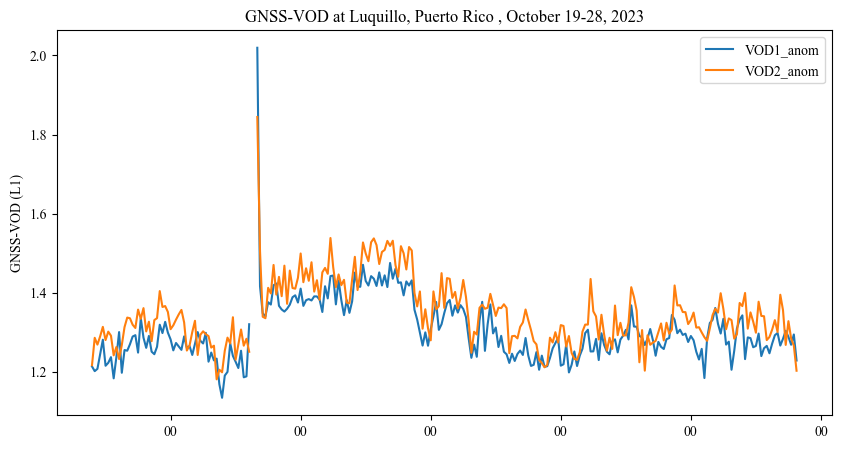

In [25]:
vod_names = ['VOD1_anom','VOD2_anom']
#without mean value 

fig, ax = plt.subplots(1,figsize=(10,5))
for i, iname in enumerate(vod_names): 
    # plot each measurement and color by signal to noise ratio
    hs = ax.plot(vod_ts.index.get_level_values('Epoch'),vod_ts[iname],label=iname)
    
myFmt = mdates.DateFormatter('%H')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('GNSS-VOD (L1)')
ax.legend()
plt.title('GNSS-VOD at Luquillo, Puerto Rico , October 19-28, 2023')
#lt.savefig('figures/illustration_vod.png',facecolor='white', transparent=False,bbox_inches='tight')

In [18]:
vod_ts = vod_anom.groupby(pd.Grouper(freq='1H', level='Epoch')).mean()
vod_ts

/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/1840474700.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_ts = vod_anom.groupby(pd.Grouper(freq='1H', level='Epoch')).mean()


VOD1      VOD2    Azimuth  Elevation       CellID  \
Epoch                                                                        
2023-10-19 19:00:00  1.236426  1.435447  -9.520125  44.664210  2163.564964   
2023-10-19 20:00:00  1.372315  1.469981  -7.664058  42.718331  2355.203848   
2023-10-19 21:00:00  1.459913  1.440883  -0.040062  41.865959  2424.891730   
2023-10-19 22:00:00  1.174933  1.199638   8.380378  38.910621  2607.007599   
2023-10-19 23:00:00  1.103516  1.084780   4.304025  36.245686  2848.154907   
...                       ...       ...        ...        ...          ...   
2023-10-30 11:00:00  1.353788  1.641521  -3.548127  45.632134  2132.798509   
2023-10-30 12:00:00  1.429638  1.400013   2.959896  41.165986  2473.552249   
2023-10-30 13:00:00  1.391344  1.405222  -4.758691  39.211047  2623.028776   
2023-10-30 14:00:00  1.187006  1.178749 -17.527710  36.765439  2821.408015   
2023-10-30 15:00:00  1.073791  1.018465  -6.673962  34.021736  3001.274061   

                     VOD1_mean  VOD1_std  VOD1_count  VOD2_mean  VOD2_std  \
Epoch                                                                       
2023-10-19 19:00:00   1.373686  0.639304  383.175609   1.470263  0.597631   
2023-10-19 20:00:00   1.430702  0.646790  383.445986   1.479776  0.577011   
2023-10-19 21:00:00   1.533122  0.643839  432.603736   1.579065  0.579105   
2023-10-19 22:00:00   1.289338  0.618413  355.174265   1.338592  0.550576   
2023-10-19 23:00:00   1.160376  0.593746  360.905548   1.202631  0.546661   
...                        ...       ...         ...        ...       ...   
2023-10-30 11:00:00   1.427259  0.652118  369.986580   1.524477  0.595024   
2023-10-30 12:00:00   1.447763  0.625556  389.117301   1.476310  0.552439   
2023-10-30 13:00:00   1.421272  0.624249  407.962148   1.404755  0.568798   
2023-10-30 14:00:00   1.164360  0.568787  390.232824   1.171469  0.529064   
2023-10-30 15:00:00   1.099149  0.584998  378.584183   1.029673  0.534090   

                     VOD2_count  Azimuth_mean  Azimuth_std  Azimuth_count  \
Epoch                                                                       
2023-10-19 19:00:00  212.326869    -10.924101     2.768531     493.239819   
2023-10-19 20:00:00  198.224010     -7.674247     0.778818     497.287828   
2023-10-19 21:00:00  231.980595     -0.117547     1.076241     546.490932   
2023-10-19 22:00:00  183.448835      8.375887     0.651314     458.650118   
2023-10-19 23:00:00  174.245991      4.295935     0.636625     468.751604   
...                         ...           ...          ...            ...   
2023-10-30 11:00:00  187.760857     -3.560126     0.934461     459.790121   
2023-10-30 12:00:00  199.040657      2.948773     0.710024     494.223356   
2023-10-30 13:00:00  209.377366     -4.777524     0.755240     525.086520   
2023-10-30 14:00:00  204.174809    -17.530303     0.639370     511.878817   
2023-10-30 15:00:00  186.723452     -6.688264     0.563884     500.069386   

                     Elevation_mean  Elevation_std  Elevation_count  \
Epoch                                                                 
2023-10-19 19:00:00       44.654701       0.547534       493.239819   
2023-10-19 20:00:00       42.724386       0.545544       497.287828   
2023-10-19 21:00:00       41.858291       0.540835       546.490932   
2023-10-19 22:00:00       38.923356       0.537802       458.650118   
2023-10-19 23:00:00       36.262888       0.543096       468.751604   
...                             ...            ...              ...   
2023-10-30 11:00:00       45.623790       0.539657       459.790121   
2023-10-30 12:00:00       41.145038       0.539614       494.223356   
2023-10-30 13:00:00       39.183636       0.553218       525.086520   
2023-10-30 14:00:00       36.741185       0.536430       511.878817   
2023-10-30 15:00:00       34.029064       0.544199       500.069386   

                     VOD1_anom  VOD2_anom  
Epoch                                 

In [19]:
vod_ts['VOD1_anom'] = vod_ts['VOD1_anom']+vod_ts['VOD1'].mean()
vod_ts['VOD2_anom'] = vod_ts['VOD2_anom']+vod_ts['VOD2'].mean()

In [20]:
#subsetting for areas with more or less vegetation based on azimuth and elevation
# Subset the vod_avg dataframe based on the specified azimuth and elevation ranges

vod_anom_subset_moreveg = vod_anom[
    (vod_anom['Azimuth_mean'] >= 120) & (vod_anom['Azimuth_mean'] <= 150) &
    (vod_anom['Elevation_mean'] >= 20) & (vod_anom['Elevation_mean'] <= 40)
]

vod_anom_subset_moreveg.head()
#
vod_anom_subset_lessveg = vod_anom[
    ((vod_anom['Azimuth_mean'] >= 30) & (vod_anom['Azimuth_mean'] <= 40) &
     (vod_anom['Elevation_mean'] >= 50) & (vod_anom['Elevation_mean'] <= 60)) 
]

vod_anom_subset_lessveg.head()

VOD1  VOD2  Azimuth  Elevation  CellID  \
Epoch               SV                                                
2023-10-19 19:02:00 E04  0.456079   NaN     37.1       52.4    1336   
2023-10-19 19:02:15 E04  0.456079   NaN     37.3       52.4    1336   
2023-10-19 19:02:30 E04  0.511494   NaN     37.4       52.5    1336   
2023-10-19 19:02:45 E04  0.310550   NaN     37.6       52.5    1336   
2023-10-19 19:03:00 E04  0.036535   NaN     37.7       52.5    1336   

                         VOD1_mean  VOD1_std  VOD1_count  VOD2_mean  VOD2_std  \
Epoch               SV                                                          
2023-10-19 19:02:00 E04   1.029885  0.563952         419   0.517415  0.677797   
2023-10-19 19:02:15 E04   1.029885  0.563952         419   0.517415  0.677797   
2023-10-19 19:02:30 E04   1.029885  0.563952         419   0.517415  0.677797   
2023-10-19 19:02:45 E04   1.029885  0.563952         419   0.517415  0.677797   
2023-10-19 19:03:00 E04   1.029885  0.563952         419   0.517415  0.677797   

                         VOD2_count  Azimuth_mean  Azimuth_std  Azimuth_count  \
Epoch               SV                                                          
2023-10-19 19:02:00 E04         274     37.257884     0.607884            501   
2023-10-19 19:02:15 E04         274     37.257884     0.607884            501   
2023-10-19 19:02:30 E04         274     37.257884     0.607884            501   
2023-10-19 19:02:45 E04         274     37.257884     0.607884            501   
2023-10-19 19:03:00 E04         274     37.257884     0.607884            501   

                         Elevation_mean  Elevation_std  Elevation_count  \
Epoch               SV                                                    
2023-10-19 19:02:00 E04       51.896407        0.59735              501   
2023-10-19 19:02:15 E04       51.896407        0.59735              501   
2023-10-19 19:02:30 E04       51.896407        0.59735              501   
2023-10-19 19:02:45 E04       51.896407        0.59735              501   
2023-10-19 19:03:00 E04       51.896407        0.59735              501   

                         VOD1_anom  VOD2_anom  
Epoch               SV                         
2023-10-19 19:02:00 E04  -0.573806        NaN  
2023-10-19 19:02:15 E04  -0.573806        NaN  
2023-10-19 19:02:30 E04  -0.518391        NaN  
2023-10-19 19:02:45 E04  -0.719335        NaN  
2023-10-19 19:03:00 E04  -0.993349        NaN

/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/2104245986.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean_moreveg = vod_numeric_moreveg.resample('H').mean()
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/2104245986.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean_lessveg = vod_numeric_lessveg.resample('H').mean()


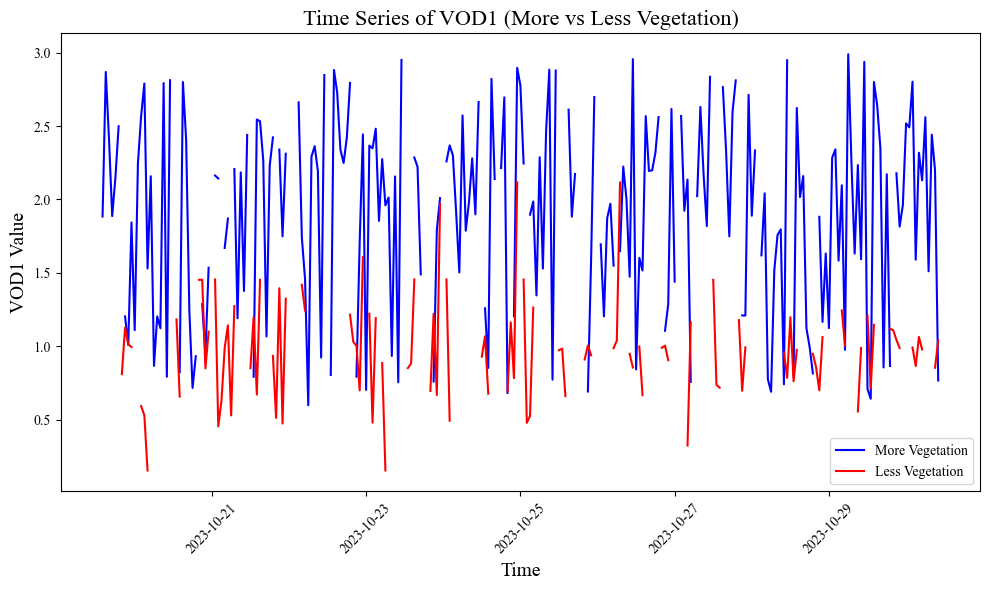

In [21]:

#diurnal cycle of VOD1- more v less veg
#reset index
vod_anom_subset_moreveg_reset = vod_anom_subset_moreveg.reset_index()
vod_anom_subset_lessveg_reset = vod_anom_subset_lessveg.reset_index()
#epoch to date time
vod_anom_subset_moreveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_moreveg_reset['Epoch'])
vod_anom_subset_lessveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_lessveg_reset['Epoch'])
#local hr
vod_anom_subset_moreveg_reset['Epoch'] = vod_anom_subset_moreveg_reset['Epoch'] + timedelta(hours=-5)
vod_anom_subset_lessveg_reset['Epoch'] = vod_anom_subset_lessveg_reset['Epoch'] + timedelta(hours=-5)
#reset index
vod_anom_subset_moreveg_reset.set_index('Epoch', inplace=True)
vod_anom_subset_lessveg_reset.set_index('Epoch', inplace=True)
#numeric values
vod_numeric_moreveg = vod_anom_subset_moreveg_reset[['VOD1_mean']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_numeric_lessveg = vod_anom_subset_lessveg_reset[['VOD1_mean']].apply(pd.to_numeric, errors='coerce').interpolate()
#hourly avg resampling
vod_hourly_mean_moreveg = vod_numeric_moreveg.resample('H').mean()
vod_hourly_mean_lessveg = vod_numeric_lessveg.resample('H').mean()
#plotting
plt.figure(figsize=(10, 6))
plt.plot(vod_hourly_mean_moreveg.index, vod_hourly_mean_moreveg['VOD1_mean'], label='More Vegetation', color='blue')
plt.plot(vod_hourly_mean_lessveg.index, vod_hourly_mean_lessveg['VOD1_mean'], label='Less Vegetation', color='red')
plt.xlabel('Time', fontsize=14)
plt.ylabel('VOD1 Value', fontsize=14)
plt.title('Time Series of VOD1 (More vs Less Vegetation)', fontsize=16)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/2912775451.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean_moreveg = vod_numeric_moreveg.resample('H').mean()
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/2912775451.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean_lessveg = vod_numeric_lessveg.resample('H').mean()


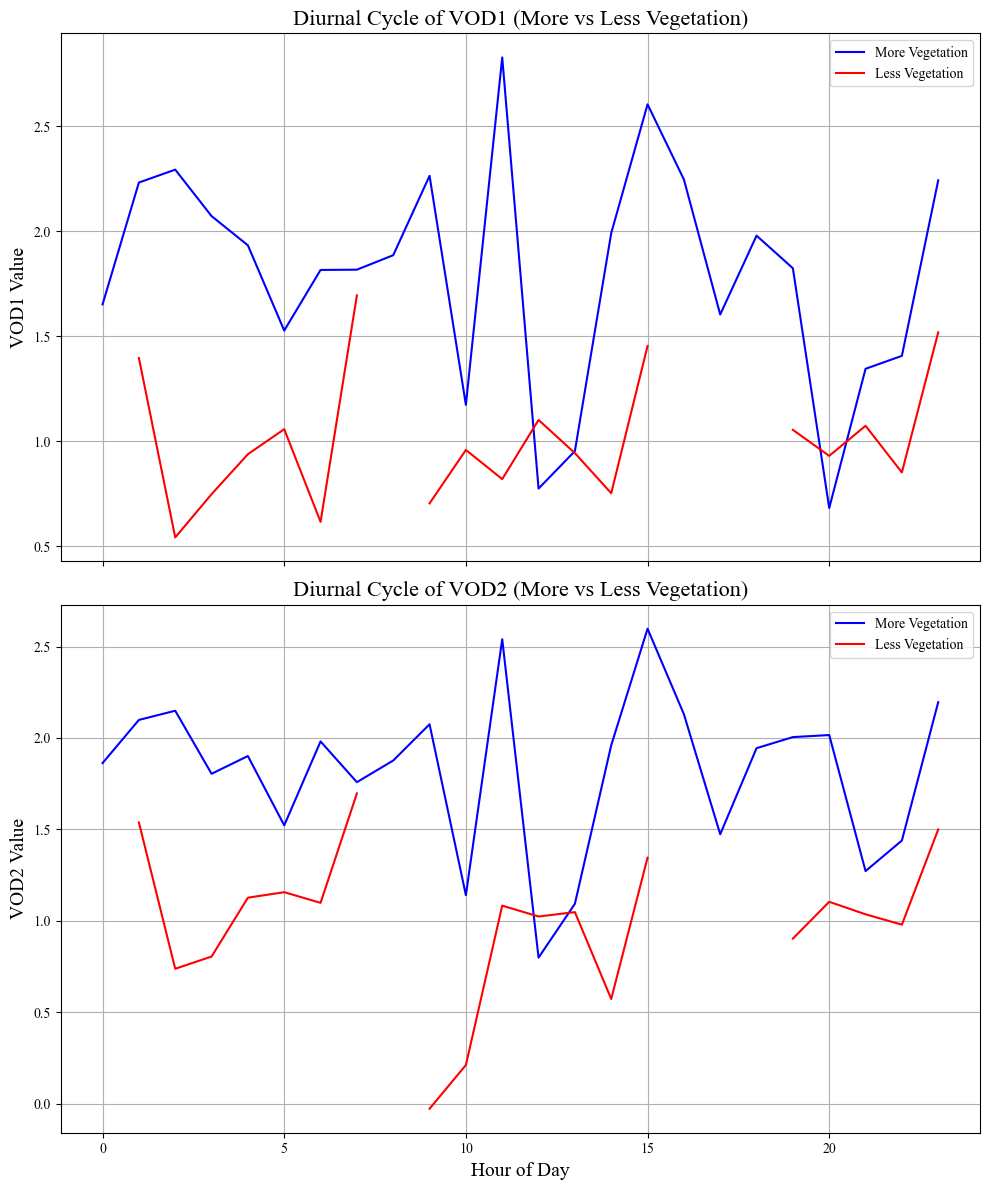

In [22]:
#diurnal cycle of VOD1- more v less veg
vod_anom_subset_moreveg_reset = vod_anom_subset_moreveg.reset_index()
vod_anom_subset_lessveg_reset = vod_anom_subset_lessveg.reset_index()
vod_anom_subset_moreveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_moreveg_reset['Epoch'])
vod_anom_subset_lessveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_lessveg_reset['Epoch'])

#local pr time
vod_anom_subset_moreveg_reset['Epoch'] = vod_anom_subset_moreveg_reset['Epoch'] + timedelta(hours=-5)
vod_anom_subset_lessveg_reset['Epoch'] = vod_anom_subset_lessveg_reset['Epoch'] + timedelta(hours=-5)
vod_anom_subset_moreveg_reset.set_index('Epoch', inplace=True)
vod_anom_subset_lessveg_reset.set_index('Epoch', inplace=True)

# removing non-numeric values and interpolating NaN values
vod_numeric_moreveg = vod_anom_subset_moreveg_reset[['VOD1_mean', 'VOD2_mean']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_numeric_lessveg = vod_anom_subset_lessveg_reset[['VOD1_mean', 'VOD2_mean']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_hourly_mean_moreveg = vod_numeric_moreveg.resample('H').mean()
vod_hourly_mean_lessveg = vod_numeric_lessveg.resample('H').mean()
vod_hourly_mean_moreveg['hour'] = vod_hourly_mean_moreveg.index.hour
vod_hourly_mean_lessveg['hour'] = vod_hourly_mean_lessveg.index.hour


vod_diurnal_moreveg = vod_hourly_mean_moreveg.groupby('hour').mean()
vod_diurnal_lessveg = vod_hourly_mean_lessveg.groupby('hour').mean()
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Plot VOD1 for more and less vegetation over 24 hours
axs[0].plot(vod_diurnal_moreveg.index, vod_diurnal_moreveg['VOD1_mean'], label='More Vegetation', color='blue')
axs[0].plot(vod_diurnal_lessveg.index, vod_diurnal_lessveg['VOD1_mean'], label='Less Vegetation', color='red')
#
axs[0].set_ylabel('VOD1 Value', fontsize=14)
axs[0].set_title('Diurnal Cycle of VOD1 (More vs Less Vegetation)', fontsize=16)
axs[0].legend()
axs[0].grid(True)
axs[1].plot(vod_diurnal_moreveg.index, vod_diurnal_moreveg['VOD2_mean'], label='More Vegetation', color='blue')
axs[1].plot(vod_diurnal_lessveg.index, vod_diurnal_lessveg['VOD2_mean'], label='Less Vegetation', color='red')
axs[1].set_xlabel('Hour of Day', fontsize=14)
axs[1].set_ylabel('VOD2 Value', fontsize=14)
axs[1].set_title('Diurnal Cycle of VOD2 (More vs Less Vegetation)', fontsize=16)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()

plt.show()


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/942154867.py:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  precipitation_4hr = precipitation_data.resample('8H').sum()  # Summing precipitation over every 8-hour period
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/942154867.py:44: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean_moreveg = vod_numeric_moreveg.resample('H').mean()
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/942154867.py:45: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean_lessveg = vod_numeric_lessveg.resample('H').mean()


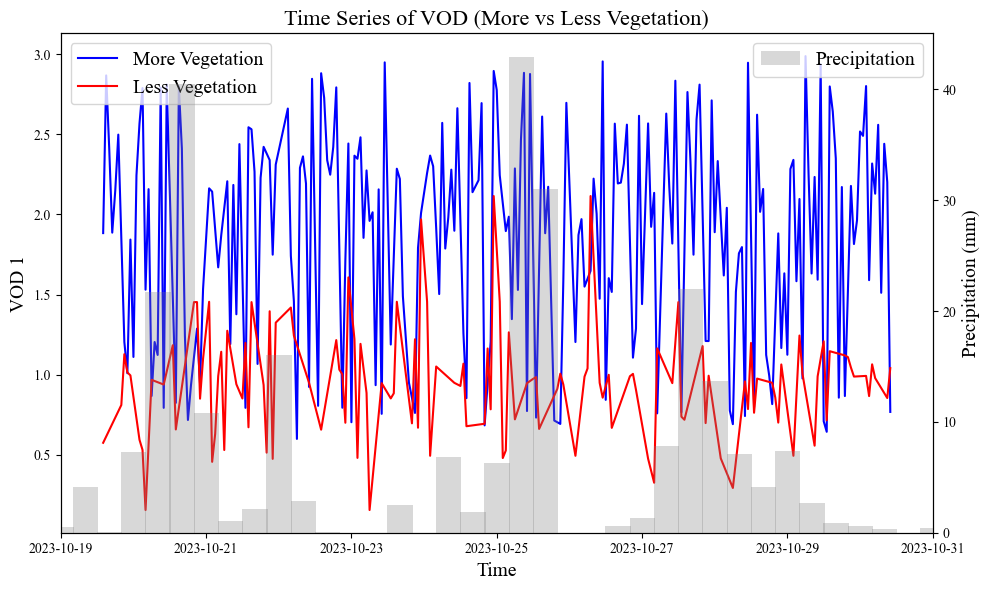

In [23]:
#overlaying more and less vegetation with precipitation

plt.rcParams["font.family"] = "Times New Roman"

precipitation_data = pd.read_csv('/Volumes/coraldelmar/AGU/Precip.csv')  
precipitation_data['Timestamp'] = pd.to_datetime(
    precipitation_data['Timestamp'], 
    format='%d/%m/%Y %H:%M',  
    dayfirst=True            
)

# resample Precipitation data to 8-hour totals
precipitation_data.set_index('Timestamp', inplace=True)
precipitation_4hr = precipitation_data.resample('8H').sum() 
vod_anom_subset_moreveg_reset = vod_anom_subset_moreveg.reset_index()
vod_anom_subset_lessveg_reset = vod_anom_subset_lessveg.reset_index()
vod_anom_subset_moreveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_moreveg_reset['Epoch'])
vod_anom_subset_lessveg_reset['Epoch'] = pd.to_datetime(vod_anom_subset_lessveg_reset['Epoch'])

# pr time
vod_anom_subset_moreveg_reset['Epoch'] = vod_anom_subset_moreveg_reset['Epoch'] + timedelta(hours=-5)
vod_anom_subset_lessveg_reset['Epoch'] = vod_anom_subset_lessveg_reset['Epoch'] + timedelta(hours=-5)

# resetepoch index
vod_anom_subset_moreveg_reset.set_index('Epoch', inplace=True)
vod_anom_subset_lessveg_reset.set_index('Epoch', inplace=True)
vod_numeric_moreveg = vod_anom_subset_moreveg_reset[['VOD1_mean', 'VOD2_mean']].apply(pd.to_numeric, errors='coerce').interpolate()
vod_numeric_lessveg = vod_anom_subset_lessveg_reset[['VOD1_mean', 'VOD2_mean']].apply(pd.to_numeric, errors='coerce').interpolate()

# resampling for hourly avgs
vod_hourly_mean_moreveg = vod_numeric_moreveg.resample('H').mean()
vod_hourly_mean_lessveg = vod_numeric_lessveg.resample('H').mean()

#plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

vod_hourly_mean_lessveg = vod_hourly_mean_lessveg.dropna()
vod_hourly_mean_moreveg = vod_hourly_mean_moreveg.dropna()
ax1.plot(vod_hourly_mean_moreveg.index, vod_hourly_mean_moreveg['VOD1_mean'], label='More Vegetation', color='blue')
ax1.plot(vod_hourly_mean_lessveg.index, vod_hourly_mean_lessveg['VOD1_mean'], label='Less Vegetation', color='red')

# 
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('VOD 1', fontsize=14)
ax1.set_title('Time Series of VOD (More vs Less Vegetation)', fontsize=16)
legend_ax1 = ax1.legend(loc='upper left', fontsize=14, frameon=True)
legend_ax1.set_zorder(10)
ax1.grid(False)
ax2 = ax1.twinx()
#  resampled to 8-hour totals precipitation 
bar_width = 0.35  
shift = 0.1  

# 
for i, x in enumerate(precipitation_4hr.index):
    ax2.bar(x + timedelta(hours=shift), 
            precipitation_4hr['Rain_mm_Tot'].iloc[i], 
            width=bar_width, 
            alpha=0.3, 
            color='gray', 
            label='Precipitation' if i == 0 else "")
ax2.set_ylabel('Precipitation (mm)', fontsize=14)
legend_ax2 = ax2.legend(loc='upper right', fontsize=14, frameon=True)
legend_ax2.set_zorder(10)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))  
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
ax1.set_xlim(pd.Timestamp('2023-10-19'), pd.Timestamp('2023-10-31'))
plt.tight_layout()
plt.show()



/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/3140440401.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean_moreveg['VOD1_mean_MA'] = vod_hourly_mean_moreveg['VOD1_mean'].rolling('24H').mean()
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_3436/3140440401.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vod_hourly_mean_lessveg['VOD1_mean_MA'] = vod_hourly_mean_lessveg['VOD1_mean'].rolling('24H').mean()


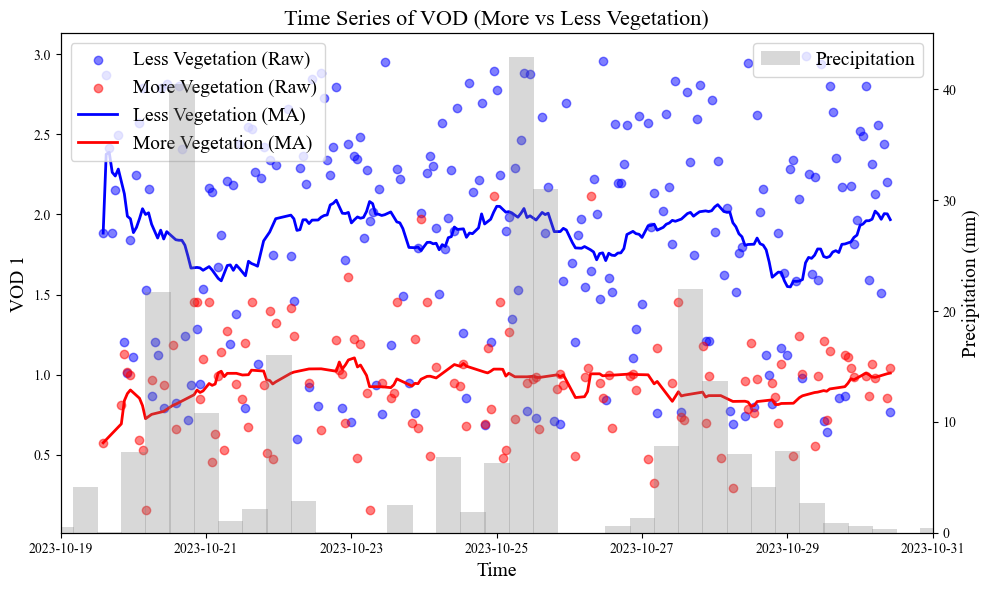

In [24]:
#as scatter plot with mnoving average
plt.rcParams["font.family"] = "Times New Roman"

vod_hourly_mean_moreveg['VOD1_mean_MA'] = vod_hourly_mean_moreveg['VOD1_mean'].rolling('24H').mean()
vod_hourly_mean_lessveg['VOD1_mean_MA'] = vod_hourly_mean_lessveg['VOD1_mean'].rolling('24H').mean()

#
fig, ax1 = plt.subplots(figsize=(10, 6))

# raw
ax1.scatter(
    vod_hourly_mean_moreveg.index, 
    vod_hourly_mean_moreveg['VOD1_mean'], 
    label='Less Vegetation (Raw)', 
    color='blue', 
    alpha=0.5
)
ax1.scatter(
    vod_hourly_mean_lessveg.index, 
    vod_hourly_mean_lessveg['VOD1_mean'], 
    label='More Vegetation (Raw)', 
    color='red', 
    alpha=0.5
)
#moving avgs
ax1.plot(
    vod_hourly_mean_moreveg.index, 
    vod_hourly_mean_moreveg['VOD1_mean_MA'], 
    label='Less Vegetation (MA)', 
    color='blue', 
    linewidth=2
)
ax1.plot(
    vod_hourly_mean_lessveg.index, 
    vod_hourly_mean_lessveg['VOD1_mean_MA'], 
    label='More Vegetation (MA)', 
    color='red', 
    linewidth=2
)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('VOD 1', fontsize=14)
ax1.set_title('Time Series of VOD (More vs Less Vegetation)', fontsize=16)
legend_ax1 = ax1.legend(loc='upper left', fontsize=14, frameon=True)
legend_ax1.set_zorder(10)
ax1.grid(False)
ax2 = ax1.twinx()

#  precipitation bars- shifting and bar width to prevent overlap
bar_width = 0.35  
shift = 0.1  
for i, x in enumerate(precipitation_4hr.index):
    ax2.bar(
        x + timedelta(hours=shift), 
        precipitation_4hr['Rain_mm_Tot'].iloc[i], 
        width=bar_width, 
        alpha=0.3, 
        color='gray', 
        label='Precipitation' if i == 0 else ""  
    )

# 
ax2.set_ylabel('Precipitation (mm)', fontsize=14)
legend_ax2 = ax2.legend(loc='upper right', fontsize=14, frameon=True)
legend_ax2.set_zorder(10)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))  
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.xticks(rotation=45)
ax1.set_xlim(pd.Timestamp('2023-10-19'), pd.Timestamp('2023-10-31'))
plt.tight_layout()
plt.show()


In [27]:
newdf=hemi.add_CellID(df)
newdf

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gnssvod/hemistats/hemistats.py:93: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idf=idf.groupby('eleind',group_keys=False).apply(azicut) # groupby will drop rows with eleind=NaN
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gnssvod/hemistats/hemistats.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  iele = idf.eleind[0]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gnssvod/hemistats/hemistats.py:80: FutureWarning: Series.__getitem__ treating keys as positions is 

S1C  S1X   S2C  S2X  Azimuth  Elevation  \
Station     Epoch               SV                                              
MACROCOSM-2 2023-10-05 14:48:45 G05  33.0  NaN   NaN  NaN     59.5       32.8   
                                G13  31.0  NaN   NaN  NaN     30.2       31.7   
                                G15  39.0  NaN   NaN  NaN     -9.8       57.2   
                                G18  42.0  NaN   NaN  NaN    -32.8       36.7   
                                G24  37.0  NaN   NaN  NaN    158.6       56.4   
...                                   ...  ...   ...  ...      ...        ...   
MACROCOSM-5 2023-10-30 15:42:15 R05  41.5  NaN  35.9  NaN     22.8       32.5   
                                R15  42.2  NaN  25.9  NaN     60.0       46.9   
                                R16  49.2  NaN  41.2  NaN    154.9       51.6   
                                R20  37.1  NaN  29.0  NaN   -117.7       34.0   
                                R21  37.3  NaN  28.0  NaN    -54.9       17.9   

                                     CellID  
Station     Epoch               SV           
MACROCOSM-2 2023-10-05 14:48:45 G05    3021  
                                G13    3005  
                                G15    1055  
                                G18    2782  
                                G24    1115  
...                                     ...  
MACROCOSM-5 2023-10-30 15:42:15 R05    3001  
                                R15    1789  
                                R16    1382  
                                R20    2926  
                                R21    4609  

[3468467 rows x 7 columns]

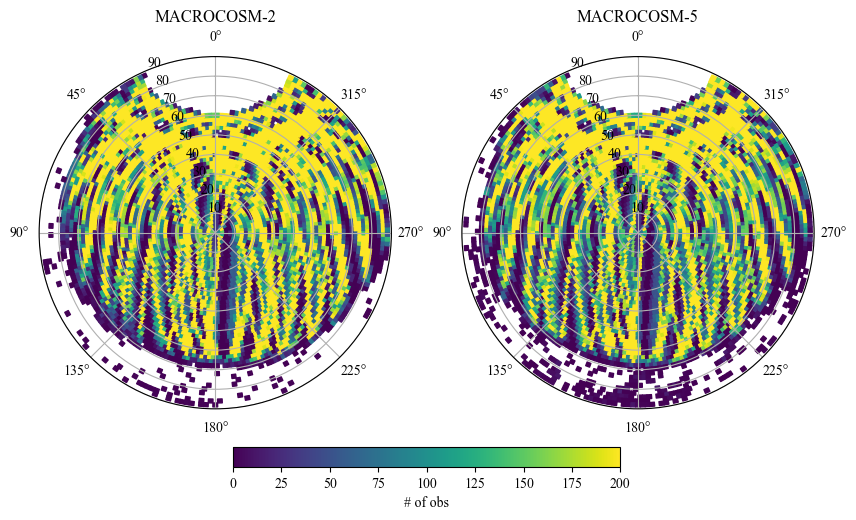

In [28]:
# number of observations 
##could be patched into larger averages using hemibuild
hemi_count = newdf.groupby(['CellID','Station']).count()
hemi_count

fig, ax = plt.subplots(1,2,figsize=(10,10),subplot_kw=dict(projection='polar'))

station_names = df.index.get_level_values('Station').unique()
for i, iname in enumerate(station_names):
    # associate the mean values to the patches, join inner will drop patches with no data, making plotting slightly faster
    ipatches = pd.concat([patches,hemi_count.xs(iname, level='Station')],join='inner',axis=1)
    # plotting with colored patches
    pc = PatchCollection(ipatches.Patches,array=ipatches.S1C,edgecolor='face', linewidth=1)
    pc.set_clim([0,200])
    ax[i].add_collection(pc)
    ax[i].set_rlim([0,90])
    ax[i].set_theta_zero_location("N")
    ax[i].set_title(iname)

plt.colorbar(pc, ax=ax, location='bottom', shrink=.5, pad=0.05, label='# of obs')